In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import os

In [3]:
#load data 
data = pd.read_excel("C:/Users/MPortal/Desktop/flavors_of_cacao.xlsx")

# Data Preparation 

In [4]:
#explore the first 5 rows 
data.head().T

,0,1,2,3,4
CompanyÂ \n(Maker-if known),A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
Specific Bean Origin\nor Bar Name,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
Review\nDate,2016,2015,2015,2015,2015
Cocoa\nPercent,0.63,0.7,0.7,0.7,0.7
Company\nLocation,France,France,France,France,France
Rating,3.75,2.75,3.0,3.5,3.5
Bean\nType,Â,Â,Â,Â,Â
Broad Bean\nOrigin,Sao Tome,Togo,Togo,Togo,Peru


In [5]:
#explore the last 5 rows 
data.tail().T

,1790,1791,1792,1793,1794
CompanyÂ \n(Maker-if known),Zotter,Zotter,Zotter,Zotter,Zotter
Specific Bean Origin\nor Bar Name,Peru,Congo,Kerala State,Kerala State,"Brazil, Mitzi Blue"
REF,647,749,749,781,486
Review\nDate,2011,2011,2011,2011,2010
Cocoa\nPercent,0.7,0.65,0.65,0.62,0.65
Company\nLocation,Austria,Austria,Austria,Austria,Austria
Rating,3.75,3.0,3.5,3.25,3.0
Bean\nType,Â,Forastero,Forastero,Â,Â
Broad Bean\nOrigin,Peru,Congo,India,India,Brazil


In [6]:
#explore description
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CompanyÂ \n(Maker-if known),1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific Bean Origin\nor Bar Name,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795.0,NaN,NaN,NaN,1035.904735,552.886365,5.0,576.0,1069.0,1502.0,1952.0
Review\nDate,1795.0,NaN,NaN,NaN,2012.325348,2.92721,2006.0,2010.0,2013.0,2015.0,2017.0
Cocoa\nPercent,1795.0,NaN,NaN,NaN,0.716983,0.063231,0.42,0.7,0.7,0.75,1.0
Company\nLocation,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795.0,NaN,NaN,NaN,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0
Bean\nType,1794,41,Â,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad Bean\nOrigin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#explore datatypes
data.dtypes

CompanyÂ \n(Maker-if known)           object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                       float64
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [8]:
##Before we continue let us rename some columns,
original_colnames = data.columns
new_colnames = ['company', 'species', 'REF', 'review_year', 'cocoa_p',
                'company_location', 'rating', 'bean_typ', 'country']
data = data.rename(columns=dict(zip(original_colnames, new_colnames)))

In [9]:
#explore the shape
data.shape

(1795, 9)

In [10]:
# Explore description
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
species,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795.0,NaN,NaN,NaN,1035.904735,552.886365,5.0,576.0,1069.0,1502.0,1952.0
review_year,1795.0,NaN,NaN,NaN,2012.325348,2.92721,2006.0,2010.0,2013.0,2015.0,2017.0
cocoa_p,1795.0,NaN,NaN,NaN,0.716983,0.063231,0.42,0.7,0.7,0.75,1.0
company_location,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1795.0,NaN,NaN,NaN,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0
bean_typ,1794,41,Â,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
## Look at most frequent species
data['species'].value_counts().head(10)

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Chuao                 19
Sambirano             19
Ocumare               17
Papua New Guinea      15
Ghana                 15
Name: species, dtype: int64

In [12]:
## Is where any N/A values in origin country?
data['country'].isnull().value_counts()

False    1794
True        1
Name: country, dtype: int64

In [13]:
## Replace origin country
data['country'] = data['country'].fillna(data['species'])
data['country'].isnull().value_counts()

False    1795
Name: country, dtype: int64

In [14]:
## Look at most frequent origin countries
data['country'].value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            146
Dominican Republic    141
Â                      73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: country, dtype: int64

In [15]:
## We see that a lot of countries have ' ' value - means that this is 100% blend. Let's look at this
data[data['country'].str.len()==1]['species'].unique()

array([], dtype=object)

In [16]:
## Is there another way to determine blends?
data[data['species'].str.contains(',')]['species'].nunique()

533

In [17]:
## Is there any misspelling/reduction?
data['country'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

In [18]:
## Text preparation (correction) func
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [19]:
data['country'].str.replace('.', '').apply(txt_prep).unique()

<ipython-input-19-2093e08cee79>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['country'].str.replace('.', '').apply(txt_prep).unique()


array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', 'Â ', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India',
       'Africa,Carribean,Central America', 'Tobago',
       'Venezuela,Indonesia,Ecuador', 'Peru,Ecuador,Ve

In [20]:
## Looks better
data['country'].value_counts().tail(10)

Madagascar & Ecuador             1
Dom. Rep., Madagascar            1
Venezuela, Dom. Rep.             1
Burma                            1
Ven, Bolivia, D.R.               1
Africa, Carribean, C. Am.        1
Nigeria                          1
Peru(SMartin,Pangoa,nacional)    1
Guat., D.R., Peru, Mad., PNG     1
Peru, Dom. Rep                   1
Name: country, dtype: int64

In [21]:
## Is there any misspelling/reduction in company location?
data['company_location'].sort_values().unique()

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [22]:
## We need to make some replacements
data['company_location'] = data['company_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')

data['company_location'].sort_values().unique()

<ipython-input-22-1da09fd50d69>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['company_location'] = data['company_location']\


array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Holland', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'St. Lucia',
       'Suriname', 'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela',
       'Vietnam', 'Wales'], dtype=object)

In [23]:
## Is there any misspelling/reduction in company name?
data['company'].str.lower().sort_values().nunique() == data['company'].sort_values().nunique()

True

# Data Visualization

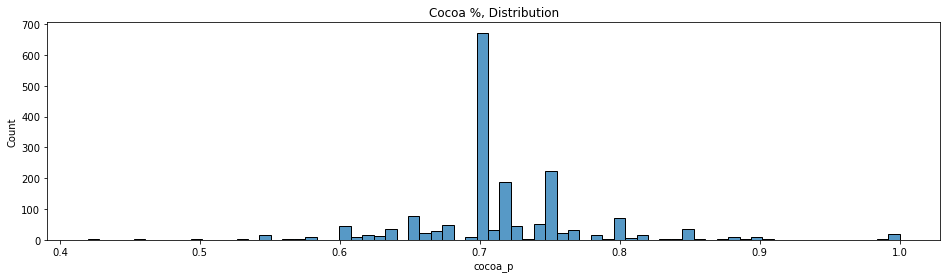

In [27]:
# what is the greatest amount of chocolate used in terms of percentage?
fig, ax = plt.subplots(figsize=[16,4])
sns.histplot(data['cocoa_p'], ax=ax)
ax.set_title('Cocoa %, Distribution')
plt.show()

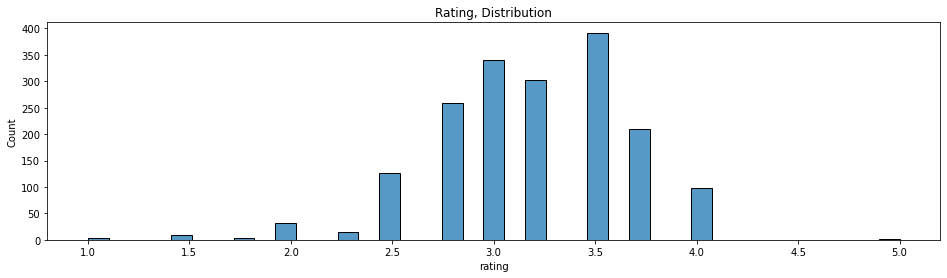

In [28]:
#what is the highest rating in the dataset?
fig, ax = plt.subplots(figsize=[16,4])
sns.histplot(data['rating'], ax=ax)
ax.set_title('Rating, Distribution')
plt.show()

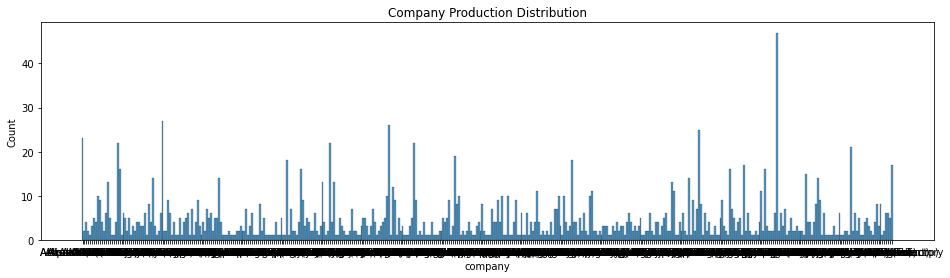

In [29]:
#which company is the highest producer of the chocolate?
fig, ax = plt.subplots(figsize=[16,4])
sns.histplot(data['company'], ax=ax)
ax.set_title('Company Production Distribution')
plt.show()

Text(0.5, 1.0, 'Boxplot, Rating for countries (+blends)')

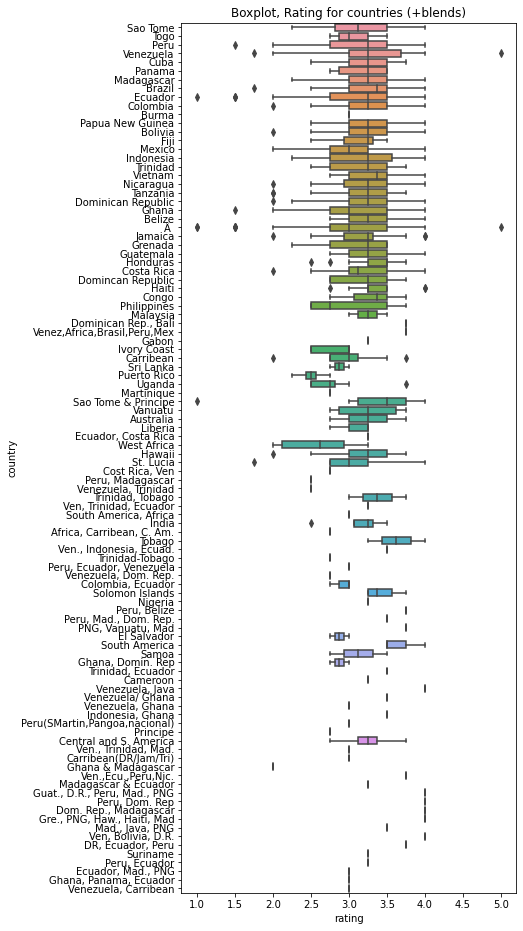

In [30]:
## Look at boxplot over the countries, even Blends
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=data,
    y='country',
    x='rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')

Text(0.5, 1.0, 'Boxplot, Rating for countries (contributors)')

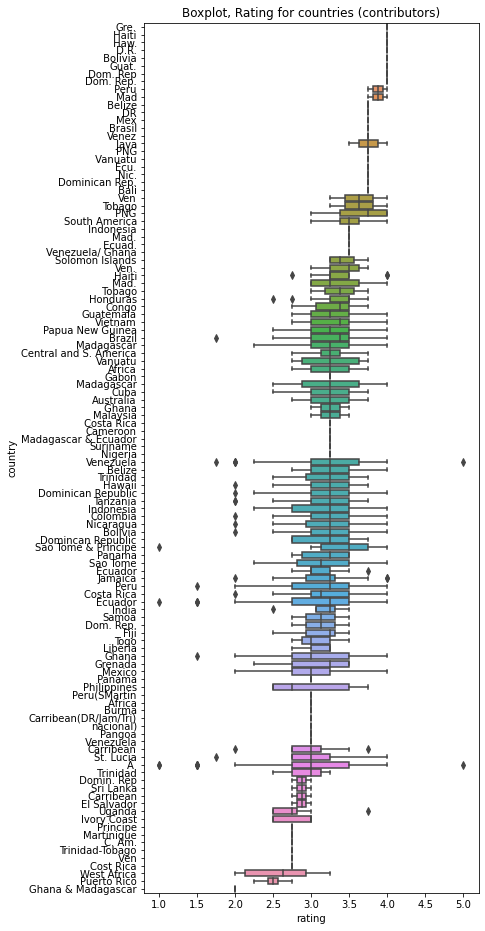

In [32]:
## But how can we see what country is biggest contributor in rating?
data_ = pd.concat([pd.Series(row['rating'], row['country'].split(',')) for _, row in data.iterrows()]
         ).reset_index()
data_.columns = ['country', 'rating']
data_['mean_rating'] = data_.groupby(['country'])['rating'].transform('mean')
## Look at boxplot over the countries (contributors in blends)
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=data_.sort_values('mean_rating', ascending=False),
    y='country',
    x='rating'
)
ax.set_title('Boxplot, Rating for countries (contributors)')

In [33]:
#what country is the biggest contributor in rating?
data_.groupby(['country'])['rating'].mean().sort_values(ascending=False).head(10)

country
 Haw.        4.000
Gre.         4.000
 Haiti       4.000
Dom. Rep.    4.000
 D.R.        4.000
 Dom. Rep    4.000
Guat.        4.000
 Bolivia     4.000
 Peru        3.875
 Mad         3.875
Name: rating, dtype: float64

<AxesSubplot:>

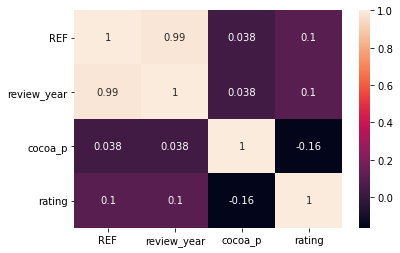

In [34]:
#what is the relationship between the rating, REF, the review and the cocoa percentage?
correlation = data.corr()
sns.heatmap(correlation, xticklabels =correlation.columns, yticklabels= correlation.columns
           , annot=True)

Text(0.5, 1.0, 'Boxplot, Rating by Company location')

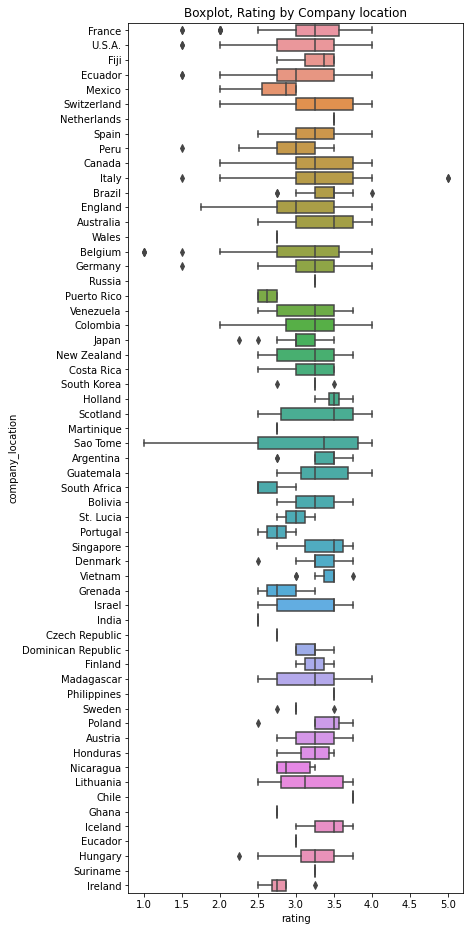

In [35]:
## Look at rating in terms of company location
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=data,
    y='company_location',
    x='rating'
)
ax.set_title('Boxplot, Rating by Company location')